In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

### 目标
我们将介绍如下3个例子，并借此介绍如何使用cvxpy
- 最小二乘问题（无约束）
- 两个多面体间的最小距离
- Markowitz 投资组合优化

**注明：此处的例子仅作为学习优化的例子，不作为实际问题的考量**

### 例子1：最小二乘

In [2]:
# 作业1的第一题的最小二乘问题
A = np.transpose(np.vstack((np.ones(5),[0,5,10,15,20])))
b = np.transpose(np.array([0, 1.27, 2.16, 2.86, 3.44]))

# 解析解
c = np.linalg.solve(A.T @ A, A.T @ b)
print("解析解 = [{:.4f}, {:.4f}]\n".format(c[0],c[1]))

# 创建优化变量
x = cp.Variable(2)

# 创建限制条件
constraints = []

# 创建目标函数
obj = cp.Minimize(cp.sum_squares(A @ x - b))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

解析解 = [0.2520, 0.1694]

status: optimal
optimal value 0.18303000000000014
optimal var [0.252  0.1694]


### 例子2：多面体间的距离

In [3]:
a1 = np.array([1,1])
b1 = 5
a2 = np.array([-1,-1])
b2 = -2
a3 = np.array([-1.5,1])
b3 = 2
a4 = np.array([1,-1])
b4 = -1

A1 = np.vstack((a1,a2,a3,a4))
b1 = np.array([b1,b2,b3,b4])

def plot_Polyhedra(A1, b1, A2, b2, cx, cy):
    x_grid = np.linspace(-1, 10, 200)
    y_list = []
    for i in range(4):
        a = A1[i,:]
        y_grid = (b1[i] - a[0] * x_grid)/a[1]
        y_list.append(y_grid)
        plt.plot(x_grid, y_grid, '-.')

    y1, y2, y3, y4 = y_list
    # Fill the region between the lines
    plt.fill_between(x_grid, y2, y3, where= (y2 < y3) & (y4 < y2), color='gray',alpha=0.3)
    plt.fill_between(x_grid, y4, y3, where= (y4 < y3) & (y3 < y1) & (y2 < y4), color='gray',alpha=0.3)
    plt.fill_between(x_grid, y4, y1, where= (y4 < y1) & (y1 < y3), color='gray',alpha=0.3)

    y_list = []
    for i in range(4):
        a = A2[i,:]
        y_grid = (b2[i] - a[0] * x_grid)/a[1]
        y_list.append(y_grid)
        plt.plot(x_grid, y_grid, '-.')

    y1, y2, y3, y4 = y_list
    # Fill the region between the lines
    plt.fill_between(x_grid, y2, y3, where= (y2 < y3) & (y4 < y2), color='gray',alpha=0.3)
    plt.fill_between(x_grid, y4, y3, where= (y4 < y3) & (y3 < y1) & (y2 < y4), color='gray',alpha=0.3)
    plt.fill_between(x_grid, y4, y1, where= (y4 < y1) & (y1 < y3), color='gray',alpha=0.3)

    plt.ylim([0 - np.abs(cy), 5 + np.abs(cy)])
    plt.xlim([1 - np.abs(cx), 4 + np.abs(cx)])

    plt.grid('equal')


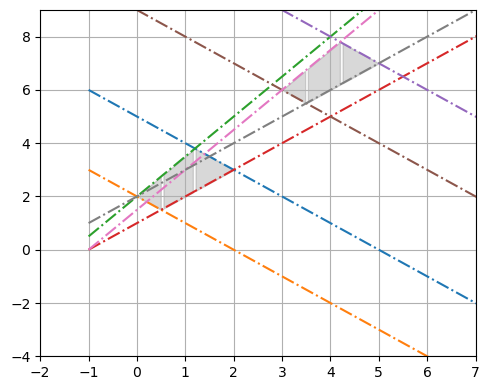

In [4]:
# 设定问题

# 平移
cx = 3
cy = 4

A2 = A1
b2 = b1 + A1[:,0] * cx + A1[:,1] * cy

fig = plt.figure(figsize=(5,4))
plot_Polyhedra(A1, b1, A2, b2, cx, cy)
plt.tight_layout()

status: optimal
optimal value 7.999999952411094
optimal var [1.25372955 3.74627122] [3.25372954 5.74627121]


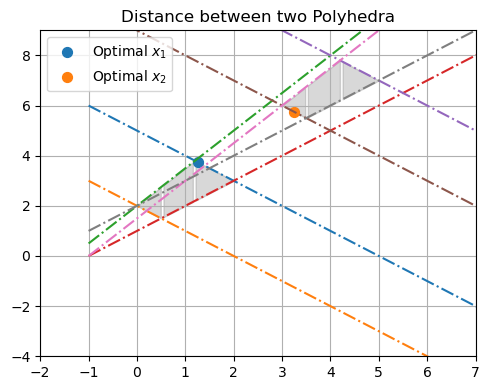

In [5]:
# 创建优化变量
x1 = cp.Variable(2)
x2 = cp.Variable(2)

# 创建限制条件
constraints = [A1 @ x1 <= b1, A2 @ x2 <= b2]

# 创建目标函数
obj = cp.Minimize(cp.sum_squares(x1 - x2))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x1.value, x2.value)

fig = plt.figure(figsize=(5,4))
plot_Polyhedra(A1, b1, A2, b2, cx, cy)
plt.scatter(x1.value[0], x1.value[1], s=50, label=r"Optimal $x_1$")
plt.scatter(x2.value[0], x2.value[1], s=50, label=r"Optimal $x_2$")
plt.legend(loc="upper left")
plt.title("Distance between two Polyhedra")
plt.tight_layout()
plt.show()

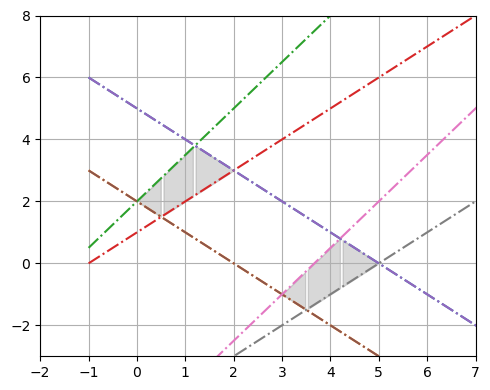

In [6]:
# 设定问题

# 平移
cx = 3
cy = -3

A2 = A1
b2 = b1 + A1[:,0] * cx + A1[:,1] * cy

fig = plt.figure(figsize=(5,4))
plot_Polyhedra(A1, b1, A2, b2, cx, cy)
plt.tight_layout()

status: optimal
optimal value 9.680000000000001
optimal var [2. 3.] [4.2 0.8]


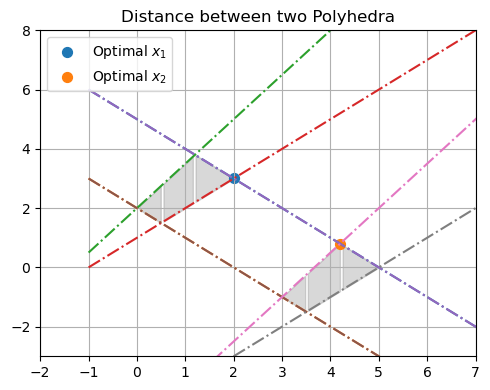

In [7]:
# 创建优化变量
x1 = cp.Variable(2)
x2 = cp.Variable(2)

# 创建限制条件
constraints = [A1 @ x1 <= b1, A2 @ x2 <= b2]

# 创建目标函数
obj = cp.Minimize(cp.sum_squares(x1 - x2))

# 创建优化问题
prob = cp.Problem(obj, constraints)
prob.solve()

# 输出结果
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x1.value, x2.value)

fig = plt.figure(figsize=(5,4))
plot_Polyhedra(A1, b1, A2, b2, cx, cy)
plt.scatter(x1.value[0], x1.value[1], s=50, label=r"Optimal $x_1$")
plt.scatter(x2.value[0], x2.value[1], s=50, label=r"Optimal $x_2$")
plt.legend(loc="upper left")
plt.title("Distance between two Polyhedra")
plt.tight_layout()
plt.show()

### 例子3：Markowitz 投资组合优化

In [8]:
# 设定问题
np.random.seed(1) #为可复现结果

n = 10
pbar = np.random.rand(n)-0.3
A = 0.05 * np.matrix(np.random.randn(n,n))
Σ = A.T @ A
rmin = 0.1

def solve_Markowitz_problem(n, pbar, Σ, rmin, verbose=False):
    # 创建优化变量
    x = cp.Variable(n, nonneg=True)

    # 创建限制条件
    constraints = [pbar @ x >= rmin, np.ones(n) @ x == 1]

    # 创建目标函数
    obj = cp.Minimize(cp.quad_form(x, Σ))

    # 创建优化问题
    prob = cp.Problem(obj, constraints)
    prob.solve()

    # 输出结果
    if verbose:
        print("status:", prob.status)
        print("optimal value", prob.value)
        print("optimal var", x.value)
    
    return x, prob

status: optimal
optimal value 0.0005277752869018024
optimal var [2.11572595e-01 0.00000000e+00 8.59724619e-02 2.81050352e-02
 0.00000000e+00 1.84176068e-22 1.97791750e-02 1.99951592e-01
 1.01888739e-01 3.52730402e-01]

status: optimal
optimal value 0.00695494577230769
optimal var [0.04354541 0.45935014 0.         0.         0.         0.
 0.         0.         0.1188936  0.37821085]



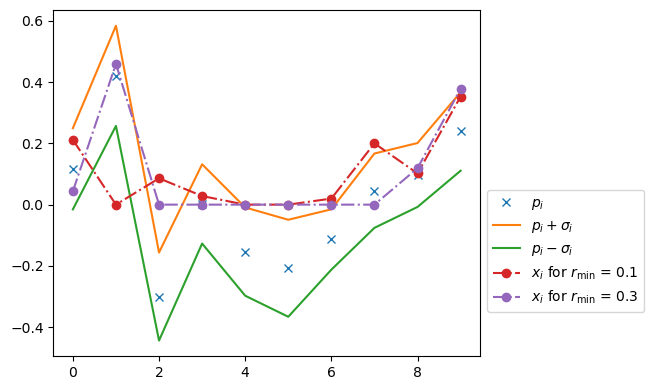

In [9]:
plt.figure(figsize=(5,4))
plt.plot(pbar, 'x', label=r"$p_i$")
plt.plot(pbar + np.sqrt(np.diag(Σ)), label=r"$p_i + σ_i$")
plt.plot(pbar - np.sqrt(np.diag(Σ)), label=r"$p_i - σ_i$")

for rmin in [0.1, 0.3]:
    x, prob = solve_Markowitz_problem(n, pbar, Σ, rmin, verbose=True)
    plt.plot(x.value, 'o-.', label=r"$x_i$ for $r_\min$ = {:.1f}".format(rmin))
    print()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

#### 需要高回报的情况，我们需要在更小的范围的可行解中进行优化，因此最优的函数值（随机性）更高

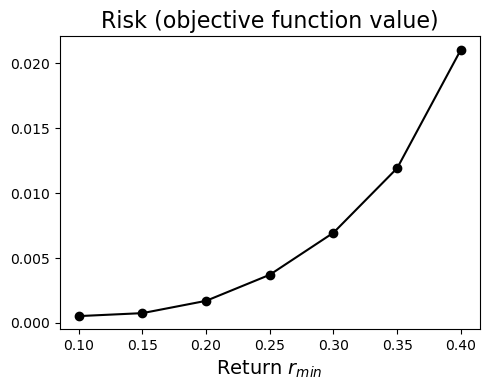

In [10]:
rmin_list = np.arange(0.1, 0.5, 0.05)
risk_list = np.zeros(len(rmin_list))
for j in range(len(rmin_list)):
    _, prob = solve_Markowitz_problem(n, pbar, Σ, rmin_list[j]);
    risk_list[j] = prob.value
plt.figure(figsize=(5,4))
plt.plot(rmin_list, risk_list, 'k-o')
plt.xlabel(r'Return $r_{min}$',fontsize=14)
plt.title('Risk (objective function value)', fontsize=16)
plt.tight_layout()
plt.show()